In [47]:
import tweepy as tw
import streamlit as st
import pandas as pd
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

sid = SentimentIntensityAnalyzer()

In [50]:
consumer_key = "axZjKR1VYdZuY03TM4iuq2UoA"
consumer_secret = "Lxu3aRWe8G5vhGhrUV9N3pxcsEooWDYnq51VbBHDhIyG7JqXSD"
access_token = "3172207346-RnnM711Tj97aJFYx5YLiX0nKjpGyRq57aRYPZed"
access_token_secret = "jFAwlXoFmVDVp56rsWVzyE48jBhu8qCotBfkfU4xxlmcE"
auth = tw.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tw.API(auth, wait_on_rate_limit=True)

In [51]:
st.title('Live Twitter Sentiment Analysis Brand Starbucks with Tweepy and VADER')
st.markdown('Coba kuy')

DeltaGenerator(_root_container=0, _provided_cursor=None, _parent=None, _block_type=None, _form_data=None)

In [52]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import re
import os
import sys
import ast
plt.style.use('fivethirtyeight')
# Function for getting the sentiment
cp = sns.color_palette()
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

In [53]:
st.title('Live Twitter Sentiment Analysis x Transformers')
query = "starbucks"
hasilSearch = api.search_tweets(q=query, count = 100, tweet_mode="extended", lang='en')

In [54]:
datat = [[tweet.user.screen_name, tweet.created_at, ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)"," ",tweet.full_text).split())] for tweet in hasilSearch]
#datat

In [55]:
tweet_text = pd.DataFrame(data=datat, 
                    columns=['user', "tanggal", "isi"])
tweet_text

,user,tanggal,isi
0,kshaw58,2022-01-09 14:44:13+00:00,RT Thank you so much for supporting our strike...
1,CartuneNetwerk,2022-01-09 14:44:08+00:00,There better be Starbucks sandwiches left or t...
2,michellexlauren,2022-01-09 14:44:08+00:00,Check out this listing I just added to my Posh...
3,stephencan550,2022-01-09 14:44:04+00:00,Ollie Google showed them open which is annoyin...
4,moneysavedblog,2022-01-09 14:43:55+00:00,How Much is Your Starbucks Addiction Costing Y...
...,...,...,...
95,Puppet_Prince_,2022-01-09 14:34:50+00:00,RT Prince Indeed on last drive to Midwest in O...
96,TheVineFights,2022-01-09 14:34:28+00:00,RT When you try to get her Starbucks order right
97,FunnyViness,2022-01-09 14:34:00+00:00,RT When you try to get her Starbucks order right
98,Sonaldx,2022-01-09 14:33:56+00:00,Starbucks order


In [56]:
df = tweet_text

In [57]:
# membersihkan data
def cleanTxt(text):
    text = re.sub('@[A-Za-z0–9]+', '', text) #Removing @mentions
    text = re.sub('#', '', text) # Removing '#' hash tag
    text = re.sub('RT[\s]+', '', text) # Removing RT
    text = re.sub('https?:\/\/\S+', '', text) # Removing hyperlink
    return text

In [58]:
df['isi'] = df['isi'].apply(cleanTxt)

In [59]:
#remove duplikat data
df.drop_duplicates(inplace = True)
df

,user,tanggal,isi
0,kshaw58,2022-01-09 14:44:13+00:00,Thank you so much for supporting our strikers ...
1,CartuneNetwerk,2022-01-09 14:44:08+00:00,There better be Starbucks sandwiches left or t...
2,michellexlauren,2022-01-09 14:44:08+00:00,Check out this listing I just added to my Posh...
3,stephencan550,2022-01-09 14:44:04+00:00,Ollie Google showed them open which is annoyin...
4,moneysavedblog,2022-01-09 14:43:55+00:00,How Much is Your Starbucks Addiction Costing Y...
...,...,...,...
95,Puppet_Prince_,2022-01-09 14:34:50+00:00,Prince Indeed on last drive to Midwest in Oct ...
96,TheVineFights,2022-01-09 14:34:28+00:00,When you try to get her Starbucks order right
97,FunnyViness,2022-01-09 14:34:00+00:00,When you try to get her Starbucks order right
98,Sonaldx,2022-01-09 14:33:56+00:00,Starbucks order


In [60]:
# Generating sentiment for all the sentence present in the dataset
emptyline=[]
for row in df['isi']:
    vs=analyzer.polarity_scores(row)
    emptyline.append(vs)
# Creating new dataframe with sentiments
df_sentiments=pd.DataFrame(emptyline)
df_sentiments.head()

,neg,neu,pos,compound
0,0.058,0.612,0.330,0.8207
1,0.317,0.529,0.153,-0.4767
2,0.000,0.811,0.189,0.6369
3,0.144,0.856,0.000,-0.4019
4,0.000,1.000,0.000,0.0000


In [61]:
# Merging the sentiments back to reviews dataframe
df_c = pd.concat([df.reset_index(drop=True), df_sentiments], axis=1)
df_c.head(3)

,user,tanggal,isi,neg,neu,pos,compound
0,kshaw58,2022-01-09 14:44:13+00:00,Thank you so much for supporting our strikers ...,0.058,0.612,0.330,0.8207
1,CartuneNetwerk,2022-01-09 14:44:08+00:00,There better be Starbucks sandwiches left or t...,0.317,0.529,0.153,-0.4767
2,michellexlauren,2022-01-09 14:44:08+00:00,Check out this listing I just added to my Posh...,0.000,0.811,0.189,0.6369


In [62]:
import numpy as np

# Convert scores into positive and negetive sentiments using some threshold
df_c['Sentiment'] = np.where(df_c['compound'] >= 0.1 , 'Positive','Negative')
df_c.head(20)

,user,tanggal,isi,neg,neu,pos,compound,Sentiment
0,kshaw58,2022-01-09 14:44:13+00:00,Thank you so much for supporting our strikers ...,0.058,0.612,0.330,0.8207,Positive
1,CartuneNetwerk,2022-01-09 14:44:08+00:00,There better be Starbucks sandwiches left or t...,0.317,0.529,0.153,-0.4767,Negative
2,michellexlauren,2022-01-09 14:44:08+00:00,Check out this listing I just added to my Posh...,0.000,0.811,0.189,0.6369,Positive
3,stephencan550,2022-01-09 14:44:04+00:00,Ollie Google showed them open which is annoyin...,0.144,0.856,0.000,-0.4019,Negative
4,moneysavedblog,2022-01-09 14:43:55+00:00,How Much is Your Starbucks Addiction Costing Y...,0.000,1.000,0.000,0.0000,Negative
5,lucadiejiwa,2022-01-09 14:43:54+00:00,SEVEN most beautiful Starbucks in Penang Diffe...,0.000,0.724,0.276,0.6361,Positive
6,gaelfan62,2022-01-09 14:43:51+00:00,They should sell Starbucks or Tim Hortons,0.000,1.000,0.000,0.0000,Negative
7,Lboogie13,2022-01-09 14:43:51+00:00,Thank you so much for supporting our strikers ...,0.058,0.612,0.330,0.8207,Positive
8,Veritas1012,2022-01-09 14:43:48+00:00,Thank you so much for supporting our strikers ...,0.058,0.612,0.330,0.8207,Positive
9,teddsyr,2022-01-09 14:43:44+00:00,Starbucks Jamaica is set to open the Caribbean...,0.000,1.000,0.000,0.0000,Negative


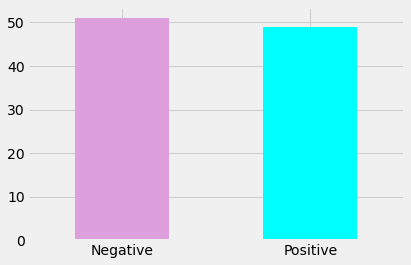

In [63]:
result=df_c['Sentiment'].value_counts()
result.plot(kind='bar', rot=0, color=['plum','cyan']);

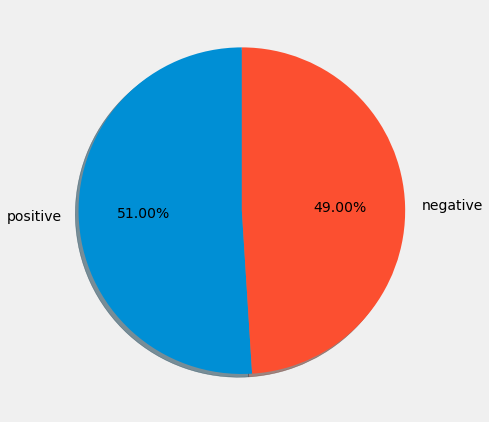

In [64]:
result=df_c['Sentiment'].value_counts()
fig = plt.figure(figsize =(10, 7))
plt.pie(result, labels = ['positive', 'negative'],  startangle=90, autopct='%.2f%%',shadow=True)
 
# show plot
plt.show()

In [65]:
pos = df_c.loc[df_c['Sentiment'] == 'Positive']
pos

,user,tanggal,isi,neg,neu,pos,compound,Sentiment
0,kshaw58,2022-01-09 14:44:13+00:00,Thank you so much for supporting our strikers ...,0.058,0.612,0.330,0.8207,Positive
2,michellexlauren,2022-01-09 14:44:08+00:00,Check out this listing I just added to my Posh...,0.000,0.811,0.189,0.6369,Positive
5,lucadiejiwa,2022-01-09 14:43:54+00:00,SEVEN most beautiful Starbucks in Penang Diffe...,0.000,0.724,0.276,0.6361,Positive
7,Lboogie13,2022-01-09 14:43:51+00:00,Thank you so much for supporting our strikers ...,0.058,0.612,0.330,0.8207,Positive
8,Veritas1012,2022-01-09 14:43:48+00:00,Thank you so much for supporting our strikers ...,0.058,0.612,0.330,0.8207,Positive
10,itlvble,2022-01-09 14:43:29+00:00,of All cats are cute they re so pretty and ado...,0.000,0.448,0.552,0.9411,Positive
11,atheena_jaafar,2022-01-09 14:43:28+00:00,SEVEN most beautiful Starbucks in Penang Diffe...,0.000,0.724,0.276,0.6361,Positive
12,BenobrienNUFC,2022-01-09 14:43:16+00:00,I hope one of your slaves will pick up your St...,0.000,0.791,0.209,0.4404,Positive
14,phillipjacob,2022-01-09 14:42:57+00:00,Your local coffee shop has better coffee than ...,0.000,0.805,0.195,0.4404,Positive
15,itsjustcigars,2022-01-09 14:42:51+00:00,Like y all are to Starbucks,0.000,0.667,0.333,0.3612,Positive


In [66]:
neg = df_c.loc[df_c['Sentiment'] == 'Negative']
neg

,user,tanggal,isi,neg,neu,pos,compound,Sentiment
1,CartuneNetwerk,2022-01-09 14:44:08+00:00,There better be Starbucks sandwiches left or t...,0.317,0.529,0.153,-0.4767,Negative
3,stephencan550,2022-01-09 14:44:04+00:00,Ollie Google showed them open which is annoyin...,0.144,0.856,0.000,-0.4019,Negative
4,moneysavedblog,2022-01-09 14:43:55+00:00,How Much is Your Starbucks Addiction Costing Y...,0.000,1.000,0.000,0.0000,Negative
6,gaelfan62,2022-01-09 14:43:51+00:00,They should sell Starbucks or Tim Hortons,0.000,1.000,0.000,0.0000,Negative
9,teddsyr,2022-01-09 14:43:44+00:00,Starbucks Jamaica is set to open the Caribbean...,0.000,1.000,0.000,0.0000,Negative
13,ashleyklinger22,2022-01-09 14:42:57+00:00,on portranco is never consistent on their hours,0.000,1.000,0.000,0.0000,Negative
18,stephencan550,2022-01-09 14:42:40+00:00,Ollie This is happening in California too I we...,0.000,1.000,0.000,0.0000,Negative
20,starbucks_of,2022-01-09 14:42:38+00:00,Already have u there but nooo don t leave,0.140,0.860,0.000,-0.0772,Negative
21,ocelotattic,2022-01-09 14:42:31+00:00,why is it so difficult for your locations to p...,0.068,0.880,0.052,-0.1880,Negative
22,YaboiPeedi,2022-01-09 14:42:13+00:00,Using Bitcoin to buy Starbucks coffee in El Sa...,0.000,1.000,0.000,0.0000,Negative


visualisasi wordcloud

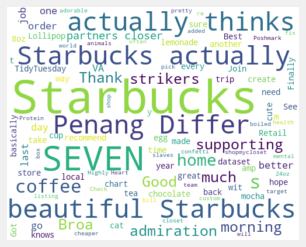

In [67]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
pos = df_c.loc[df_c['Sentiment'] == 'Positive']
wordcloud2 = WordCloud(max_words=100, background_color="white", width = 500, height = 400).generate(' '.join(pos['isi']))
plt.imshow(wordcloud2, interpolation='bilinear')
plt.axis("off")
plt.show()
wordcloud2.to_file("pos.png")

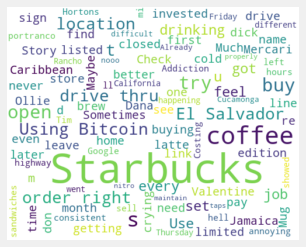

In [68]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
neg = df_c.loc[df_c['Sentiment'] == 'Negative']
wordcloud2 = WordCloud(max_words=100, background_color="white", width = 500, height = 400).generate(' '.join(neg['isi']))
plt.imshow(wordcloud2, interpolation='bilinear')
plt.axis("off")
plt.show()
wordcloud2.to_file("neg.png")